In [1]:
import FinMind
import pandas as pd 
import numpy as np
import talib
import math
import matplotlib.pyplot as plt
import matplotlib

from FinMind.data import DataLoader
from sklearn.decomposition import PCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Problem 1

In [2]:
api = DataLoader()
df = api.taiwan_stock_daily(
    stock_id='TAIEX',
    start_date='2012-12-01',
    end_date='2018-12-02'
)
df.drop(columns=['stock_id', 'Trading_money', 'spread', 'Trading_turnover'],inplace=True)
df.rename(columns={'Trading_Volume':'volume', 'max':'high', 'min':'low'},inplace=True)
df

,date,volume,open,high,low,close
0,2012-12-03,3696524900,7582.65,7628.29,7562.19,7599.91
1,2012-12-04,3947860691,7572.11,7600.98,7536.66,7600.98
2,2012-12-05,4858910844,7575.63,7650.12,7567.46,7649.05
3,2012-12-06,4399887242,7660.97,7673.62,7616.79,7623.26
4,2012-12-07,3888752378,7640.25,7672.92,7631.63,7642.26
...,...,...,...,...,...,...
1470,2018-11-26,3938988241,9679.98,9847.35,9679.98,9765.36
1471,2018-11-27,4333008909,9728.95,9781.40,9688.74,9778.62
1472,2018-11-28,5413428690,9774.03,9890.89,9767.14,9884.31
1473,2018-11-29,5863859324,9959.87,10001.85,9885.36,9885.36


In [3]:
df.to_csv('output/problem1.csv')

# Problem 2

In [4]:
close_array = np.array(df['close'])

In [5]:
label = []
for i in range(0, len(close_array)):
    length = len(close_array[i:])
    if length > 21:
        length = 21
    if length == 21:
        for j in range(0, length):
            upper_bound = close_array[i] * 1.04
            lower_bound = close_array[i] * 0.98
            if close_array[i+j] >= upper_bound:
                label.append(1)
                break
            elif close_array[i+j] <= lower_bound:
                label.append(2)
                break
        if len(label) != i+1:
            label.append(0)
    else:
        for j in range(0, length):
            upper_bound = close_array[i] * 1.04
            lower_bound = close_array[i] * 0.98
            if close_array[i+j] >= upper_bound:
                label.append(1)
                break
            elif close_array[i+j] <= lower_bound:
                label.append(2)
                break
        if len(label) != i+1:
            label.append(np.nan)

In [6]:
df['label'] = label
df

,date,volume,open,high,low,close,label
0,2012-12-03,3696524900,7582.65,7628.29,7562.19,7599.91,0.0
1,2012-12-04,3947860691,7572.11,7600.98,7536.66,7600.98,0.0
2,2012-12-05,4858910844,7575.63,7650.12,7567.46,7649.05,0.0
3,2012-12-06,4399887242,7660.97,7673.62,7616.79,7623.26,0.0
4,2012-12-07,3888752378,7640.25,7672.92,7631.63,7642.26,0.0
...,...,...,...,...,...,...,...
1470,2018-11-26,3938988241,9679.98,9847.35,9679.98,9765.36,NaN
1471,2018-11-27,4333008909,9728.95,9781.40,9688.74,9778.62,NaN
1472,2018-11-28,5413428690,9774.03,9890.89,9767.14,9884.31,NaN
1473,2018-11-29,5863859324,9959.87,10001.85,9885.36,9885.36,NaN


In [7]:
df.to_csv('output/problem2.csv')

# Problem 3

In [8]:
df['MA-5'] = (df['close'] - talib.MA(df.close, timeperiod=5, matype=0)) / talib.MA(df.close, timeperiod=5, matype=0)
df['MA-10'] = (df['close'] - talib.MA(df.close, timeperiod=10, matype=0)) / talib.MA(df.close, timeperiod=10, matype=0)
df['MA-20'] = (df['close'] - talib.MA(df.close, timeperiod=20, matype=0)) / talib.MA(df.close, timeperiod=20, matype=0)
df['MA-60'] = (df['close'] - talib.MA(df.close, timeperiod=60, matype=0)) / talib.MA(df.close, timeperiod=60, matype=0)
df['RSI-14'] = talib.RSI(df.close, timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df.close)
df.dropna(inplace=True)

In [9]:
df.to_csv('output/problem3.csv', index=False)

# Problem 4

In [10]:
df = pd.read_csv('output/problem3.csv')

In [11]:
y = np.array(df['label'])

In [12]:
df.drop(columns=['date', 'label'],inplace=True)
df

,volume,open,high,low,close,MA-5,MA-10,MA-20,MA-60,RSI-14,MACD,MACD_signal,MACD_hist
0,3923678149,7958.11,7982.39,7936.86,7950.30,0.003497,0.002135,0.004302,0.024105,56.429268,43.544898,51.947231,-8.402333
1,3629314119,7950.90,7984.29,7942.37,7960.51,0.003202,0.003384,0.004586,0.024626,57.172977,43.431253,50.244035,-6.812782
2,4161212736,7981.00,8029.14,7981.00,8015.14,0.008803,0.009412,0.010319,0.030742,61.008046,47.205221,49.636272,-2.431051
3,4284798782,8021.88,8089.21,8001.85,8038.72,0.007425,0.011721,0.012088,0.032912,62.566221,51.505108,50.010039,1.495069
4,4200531442,8039.00,8063.23,7986.59,7994.71,0.000355,0.005587,0.005668,0.026441,57.914429,50.776243,50.163280,0.612963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,5494351265,9812.20,9869.59,9742.61,9844.74,0.021695,0.013590,-0.010346,-0.068980,40.839360,-269.501322,-280.062247,10.560924
1395,6166533874,9871.40,9906.59,9817.29,9906.59,0.019283,0.020091,-0.000046,-0.061402,43.525110,-240.833821,-272.216561,31.382741
1396,4881248460,9856.85,9889.81,9786.25,9889.81,0.009795,0.019250,0.001431,-0.061305,42.955357,-216.967558,-261.166761,44.199203
1397,4947603515,9818.15,9912.53,9817.95,9908.35,0.003389,0.019074,0.009387,-0.056561,44.693221,-179.493711,-235.200728,55.707018


In [13]:
pca = PCA(n_components=2, random_state=0)
pca.fit(df)

PCA(n_components=2, random_state=0)

In [14]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[1.00000000e+00 1.96666053e-12]
[1. 1.]


Text(0, 0.5, 'Explained Variance')

Text(0.5, 0, 'Principal Components')

([<matplotlib.axis.XTick at 0x2830c540e50>,
 [Text(0, 0, '1st comp'), Text(1, 0, '2nd comp')])

Text(0.5, 1.0, 'Explained Variance Ratio')

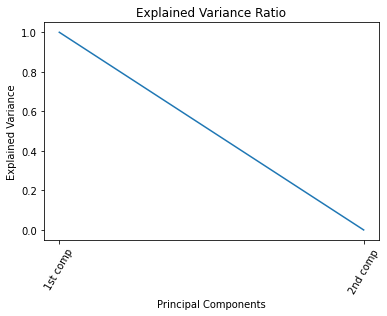

In [15]:
plt.plot(range(0,2), [1.00000000e+00, 1.96666053e-12])
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,2), ["1st comp", "2nd comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

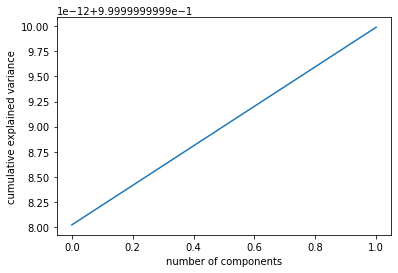

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [17]:
df_pca = pca.transform(df)

In [18]:
print(df.shape)
print(df_pca.shape)

(1399, 13)
(1399, 2)


Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

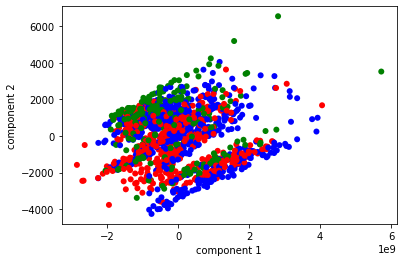

In [19]:
index = 0
color = []
for i in df_pca:
    if y[index] == 0:
        color.append('red')
    elif y[index] == 1:
        color.append('green')
    else:
        color.append('blue')
    index += 1
colors = ['red', 'green', 'blue']
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.scatter(df_pca[:,0], df_pca[:,1], c=color, edgecolor='none')

## Discuss pros and cons of PCA method in this dataset.

* pros:
1. 移除相關特徵
2. 增加演算法的效能
3. 減少 overfitting
* cons:
1. 我覺得降到二維有點太低了，視覺化出來的圖片會很難看